# Import Library

In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.patches as mpatches
import xgboost
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
import string
import plotly.offline as py
import plotly.graph_objs as go

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from collections import Counter
from collections import defaultdict

from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve

from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from plotly import tools
py.init_notebook_mode(connected=True)


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alrziki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alrziki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import important data
Such as post time
and the data

In [3]:
post_time = "2023-07-19T15:05:13.000Z"

In [4]:
data = pd.read_csv('Instagram-post-Cu4iHlRsBed.csv')

In [5]:
data.head(10)

,username,comments,likes,datetime
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19T15:07:18.000Z
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19T15:06:50.000Z
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19T15:14:59.000Z
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19T15:14:18.000Z
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19T15:06:04.000Z
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19T15:09:04.000Z
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19T15:11:18.000Z
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19T15:13:32.000Z
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19T16:30:27.000Z
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19T15:15:44.000Z


In [6]:
lenght = len(data['comments'][0])
print(f'Length of a sample comment: {lenght}')

Length of a sample comment: 59


In [7]:
data['Length'] = data['comments'].str.len()
data.head(10)

,username,comments,likes,datetime,Length
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19T15:07:18.000Z,59
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19T15:06:50.000Z,26
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19T15:14:59.000Z,48
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19T15:14:18.000Z,106
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19T15:06:04.000Z,80
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19T15:09:04.000Z,133
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19T15:11:18.000Z,98
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19T15:13:32.000Z,77
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19T16:30:27.000Z,32
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19T15:15:44.000Z,254


# Count The Length of the sentence and Word

In [8]:
word_count = data['comments'][0].split()
print(f'Word count in a sample comment: {len(word_count)}')

Word count in a sample comment: 11


In [12]:
def word_count(comment):
    comment_list = comment.split()
    return len(comment_list)

In [13]:
data['word_count'] = data['comments'].apply(word_count)
data.head(10)

,username,comments,likes,datetime,Length,mean_sent_length,word_count
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19T15:07:18.000Z,59,59.0,11
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19T15:06:50.000Z,26,26.0,6
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19T15:14:59.000Z,48,48.0,8
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19T15:14:18.000Z,106,106.0,22
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19T15:06:04.000Z,80,80.0,17
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19T15:09:04.000Z,133,66.0,28
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19T15:11:18.000Z,98,98.0,18
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19T15:13:32.000Z,77,77.0,15
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19T16:30:27.000Z,32,15.5,7
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19T15:15:44.000Z,254,126.5,46


In [14]:
data['mean_word_length'] = data['comments'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19T15:07:18.000Z,59,59.0,11,4.454545
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19T15:06:50.000Z,26,26.0,6,3.500000
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19T15:14:59.000Z,48,48.0,8,5.125000
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19T15:14:18.000Z,106,106.0,22,3.863636
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19T15:06:04.000Z,80,80.0,17,3.764706
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19T15:09:04.000Z,133,66.0,28,3.785714
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19T15:11:18.000Z,98,98.0,18,4.500000
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19T15:13:32.000Z,77,77.0,15,4.200000
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19T16:30:27.000Z,32,15.5,7,3.714286
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19T15:15:44.000Z,254,126.5,46,4.543478


In [15]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['comments'][0])])

59.0

In [16]:
data['mean_sent_length'] = data['comments'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19T15:07:18.000Z,59,59.0,11,4.454545
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19T15:06:50.000Z,26,26.0,6,3.500000
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19T15:14:59.000Z,48,48.0,8,5.125000
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19T15:14:18.000Z,106,106.0,22,3.863636
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19T15:06:04.000Z,80,80.0,17,3.764706
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19T15:09:04.000Z,133,66.0,28,3.785714
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19T15:11:18.000Z,98,98.0,18,4.500000
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19T15:13:32.000Z,77,77.0,15,4.200000
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19T16:30:27.000Z,32,15.5,7,3.714286
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19T15:15:44.000Z,254,126.5,46,4.543478


In [17]:
print(data["username"].unique())

['deshawn.hw' 'prizzlethegreat' 'no.mans.guy' 'herodelta' 'itsbriangoon'
 'husseinaljanabi' 'brug_im_sleep' 'officialapexworld' '1xtitan'
 'raaed.khan214' 'apex.wiz' 'mayor_of_apex' '_marshall_mxl'
 'basicallymarii' 'mytechnicalities' 'hhx_3dart' 'santihawk'
 'jrfromthetrapspam' 'king.quani392' 'planetdab' 'wickgeek' 'gsviesa'
 'oisin.j.king' 'owo_bolt' '_.robotickz' 'dannymondelli' 'soarkobi'
 'jerome761993' 'bertoqr.ig' 'joshinya17' 'justin.sann' '4kworldwide'
 'v0.iid' 'thisdudeiswaysilly' 'mkgwayflight' 'rawrrrbyn'
 'r00sterc0gburne' 'knife15_' 'laroyce._' 'thicknmessy' 'sambangparinda'
 'matijjas' 'sami_berta04' 'oneofmany33' 'stolencrucifix87' 'jalrxn'
 'just.for.save.clip' 'hydracat88' 'adrian_g_mcloving'
 '___christiancollins' 'pastymexican714' 'armand__es' 'gl1tch.chersi'
 'owen.p.10' 'jakehall27' 'whittythewanderer' 'jaydub4587'
 'plmpmyomelette' 'mohammed.chucha' '_mvnu_' 'apex_memextuve'
 'dsczaplicki' 'herbi_111' 'ptrjsphrvra' 'sheluvmarc' 'bkent016'
 'i_am_yourdevil__' 'd

# Check Duplicated username

In [18]:
user_unique = data["username"].unique()

In [19]:
print(len(data["username"]))

105


In [20]:
data2 = data.copy()
data2['duplicated'] = data2.duplicated()

In [21]:
data2[(data2['duplicated']==True)]

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,duplicated


No data duplicated but let see into the detail to make sure there is no data duplicated

In [22]:
pd.concat(g for _, g in data2.groupby("username") if len(g) > 1)

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,duplicated
59,mohammed.chucha,Can we invite more than 3 players when we play...,3,2023-07-19T15:16:37.000Z,63,63.0,11,4.818182,False
93,mohammed.chucha,Finally 🕺🏻,1,2023-07-19T15:14:19.000Z,10,10.0,2,4.500000,False
19,planetdab,@royaclyps fr tho I threw in the towel mad qui...,1,2023-07-19T16:28:43.000Z,60,60.0,12,4.083333,False
23,planetdab,Took yall a whole season to figure out its gar...,33,2023-07-19T15:11:59.000Z,93,93.0,20,3.700000,False


# Data Info

In [23]:
data.describe()

,Length,mean_sent_length,word_count,mean_word_length
count,105.000000,105.000000,105.000000,105.000000
mean,74.609524,60.145397,14.076190,4.875045
std,86.633567,77.450576,16.775495,1.788040
min,3.000000,3.000000,1.000000,3.000000
25%,25.000000,19.000000,4.000000,4.000000
50%,47.000000,39.000000,9.000000,4.428571
75%,88.000000,71.000000,17.000000,5.125000
max,574.000000,574.000000,112.000000,16.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   username          105 non-null    object 
 1   comments          105 non-null    object 
 2   likes             105 non-null    object 
 3   datetime          105 non-null    object 
 4   Length            105 non-null    int64  
 5   mean_sent_length  105 non-null    float64
 6   word_count        105 non-null    int64  
 7   mean_word_length  105 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.7+ KB


# Create Hours, Minute, Hours difference, and Minutes Difference

The reason to do this so we can see the comment trends

In [25]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [26]:
data['hours'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

In [27]:
data

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,hours,minute
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19 15:07:18+00:00,59,59.0,11,4.454545,15,7
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19 15:06:50+00:00,26,26.0,6,3.500000,15,6
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19 15:14:59+00:00,48,48.0,8,5.125000,15,14
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19 15:14:18+00:00,106,106.0,22,3.863636,15,14
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19 15:06:04+00:00,80,80.0,17,3.764706,15,6
...,...,...,...,...,...,...,...,...,...,...
100,chriszevgolis,Hahaha what a joke. Game is dead af,1,2023-07-19 15:13:32+00:00,35,17.0,8,3.500000,15,13
101,suvansh_pathania,bring 120FPS ON CONSOLEEEE😢,1,2023-07-19 15:13:43+00:00,27,27.0,4,6.000000,15,13
102,rell.1990,W 🏌🏾‍♂️,1,2023-07-19 15:13:39+00:00,7,7.0,2,3.000000,15,13
103,zayney_,fix control,1,2023-07-19 15:13:21+00:00,11,11.0,2,5.000000,15,13


In [28]:
post_times = pd.to_datetime(post_time)

In [29]:
post_hour = post_times.hour
post_minute = post_times.minute

In [30]:
print(post_hour)
print(post_minute)

15
5


In [32]:
data['hour_difference'] = abs(data['hours'] - post_hour)
data['minute_difference'] = (abs((data['hours'] - post_hour)) * 60) + abs(data['minute'] - post_minute)
data

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,hours,minute,hour_difference,minute_difference
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19 15:07:18+00:00,59,59.0,11,4.454545,15,7,0,2
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19 15:06:50+00:00,26,26.0,6,3.500000,15,6,0,1
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19 15:14:59+00:00,48,48.0,8,5.125000,15,14,0,9
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19 15:14:18+00:00,106,106.0,22,3.863636,15,14,0,9
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19 15:06:04+00:00,80,80.0,17,3.764706,15,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100,chriszevgolis,Hahaha what a joke. Game is dead af,1,2023-07-19 15:13:32+00:00,35,17.0,8,3.500000,15,13,0,8
101,suvansh_pathania,bring 120FPS ON CONSOLEEEE😢,1,2023-07-19 15:13:43+00:00,27,27.0,4,6.000000,15,13,0,8
102,rell.1990,W 🏌🏾‍♂️,1,2023-07-19 15:13:39+00:00,7,7.0,2,3.000000,15,13,0,8
103,zayney_,fix control,1,2023-07-19 15:13:21+00:00,11,11.0,2,5.000000,15,13,0,8


In [33]:
data['minute_difference'].value_counts()

minute_difference
8      7
11     6
9      6
13     6
10     6
      ..
14     1
243    1
219    1
274    1
445    1
Name: count, Length: 62, dtype: int64

# Simple Analysis - 1 from the data

Positive Review Words:0      2
1      1
2      9
3      9
4      1
      ..
100    8
101    8
102    8
103    8
104    5
Name: minute_difference, Length: 105, dtype: int32


C:\Users\Alrziki\AppData\Local\Temp\ipykernel_23500\1140532866.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




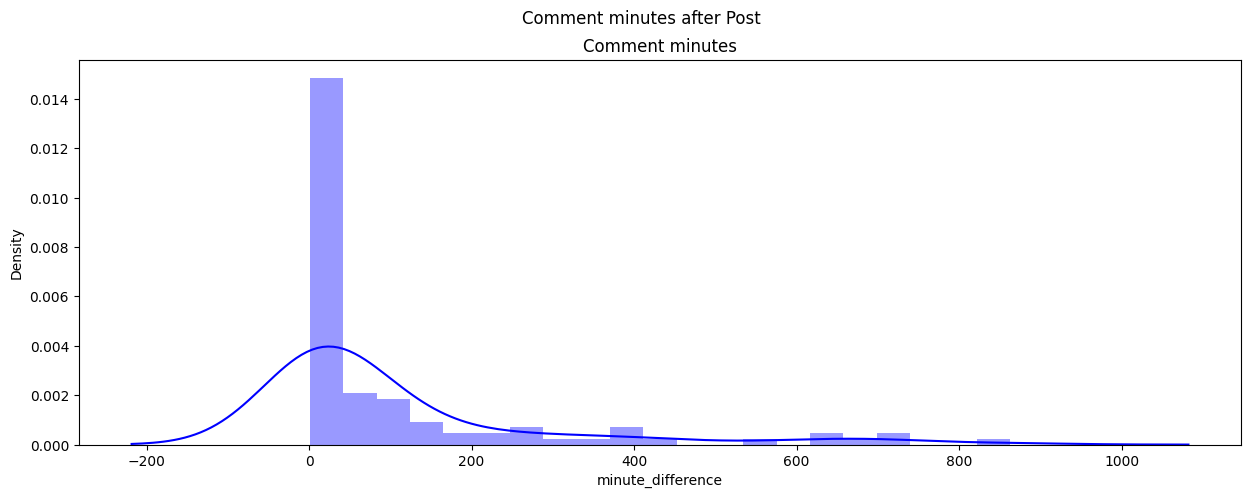

In [34]:
#Analyse the comment trends
#Function for checking word length
#def cal_len(data):
#    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,title_1,subtitle):
    fig,(ax1)=plt.subplots(1,1,figsize=(15,5))
    sns.distplot(count_ones,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    #sns.distplot(count_ones,ax=ax2,color='Red')
    #ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=data['minute_difference']
print("Positive Review Words:" + str(count_good_words))
plot_count(count_good_words,"Comment minutes","Comment minutes after Post")

C:\Users\Alrziki\AppData\Local\Temp\ipykernel_23500\4135493439.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




[Text(0.5, 0, 'Hours After Post'), Text(0, 0.5, 'Count')]

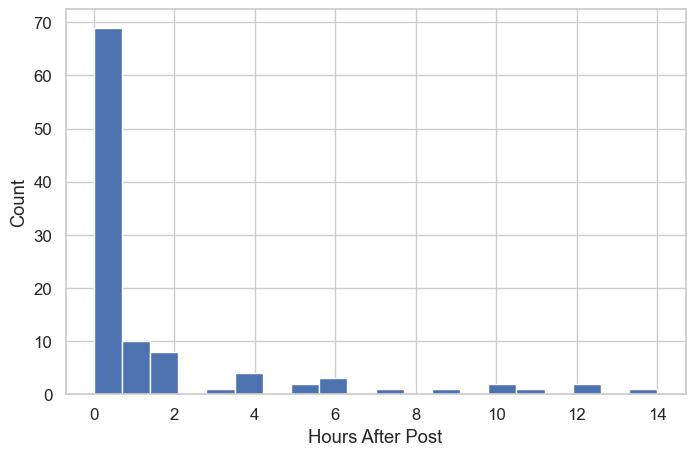

In [39]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['hour_difference'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Hours After Post', ylabel='Count')

C:\Users\Alrziki\AppData\Local\Temp\ipykernel_23500\1443030893.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




[Text(0.5, 0, 'Minute After Post'), Text(0, 0.5, 'Count')]

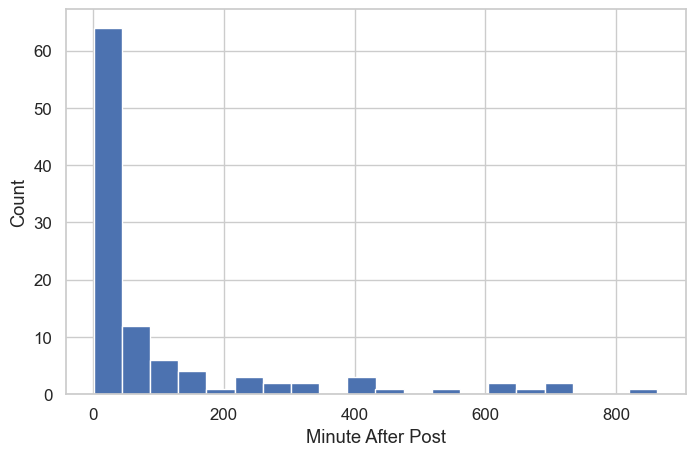

In [40]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['minute_difference'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Minute After Post', ylabel='Count')

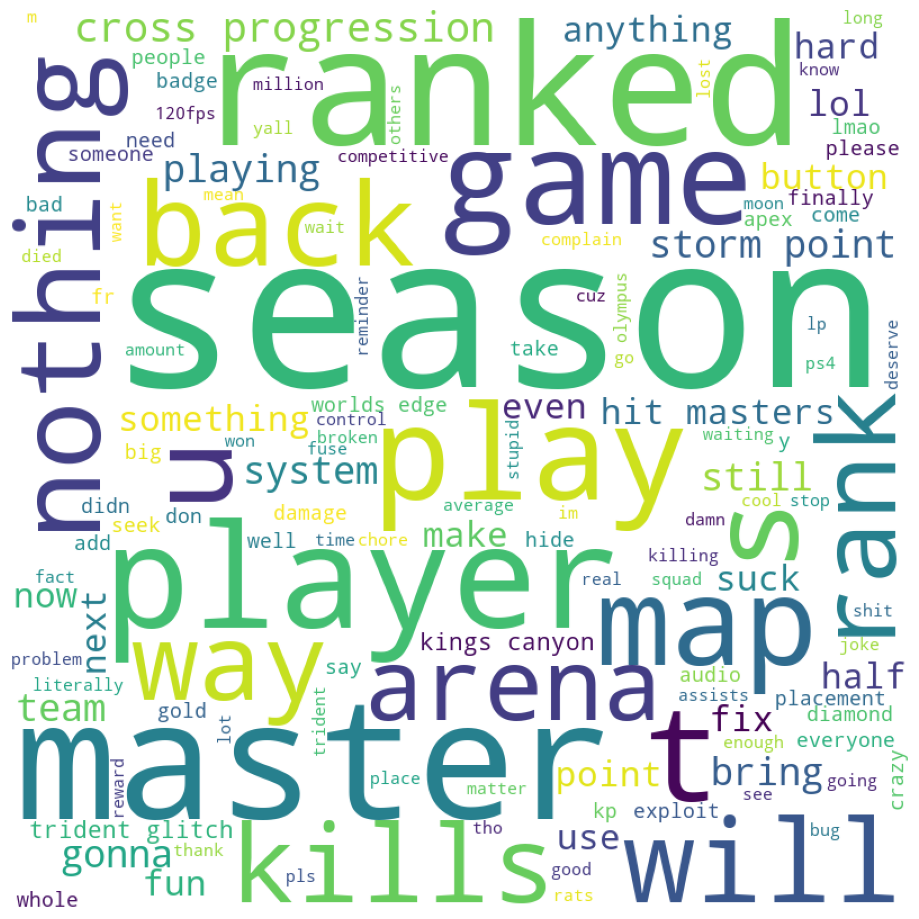

In [41]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 14).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<Axes: >

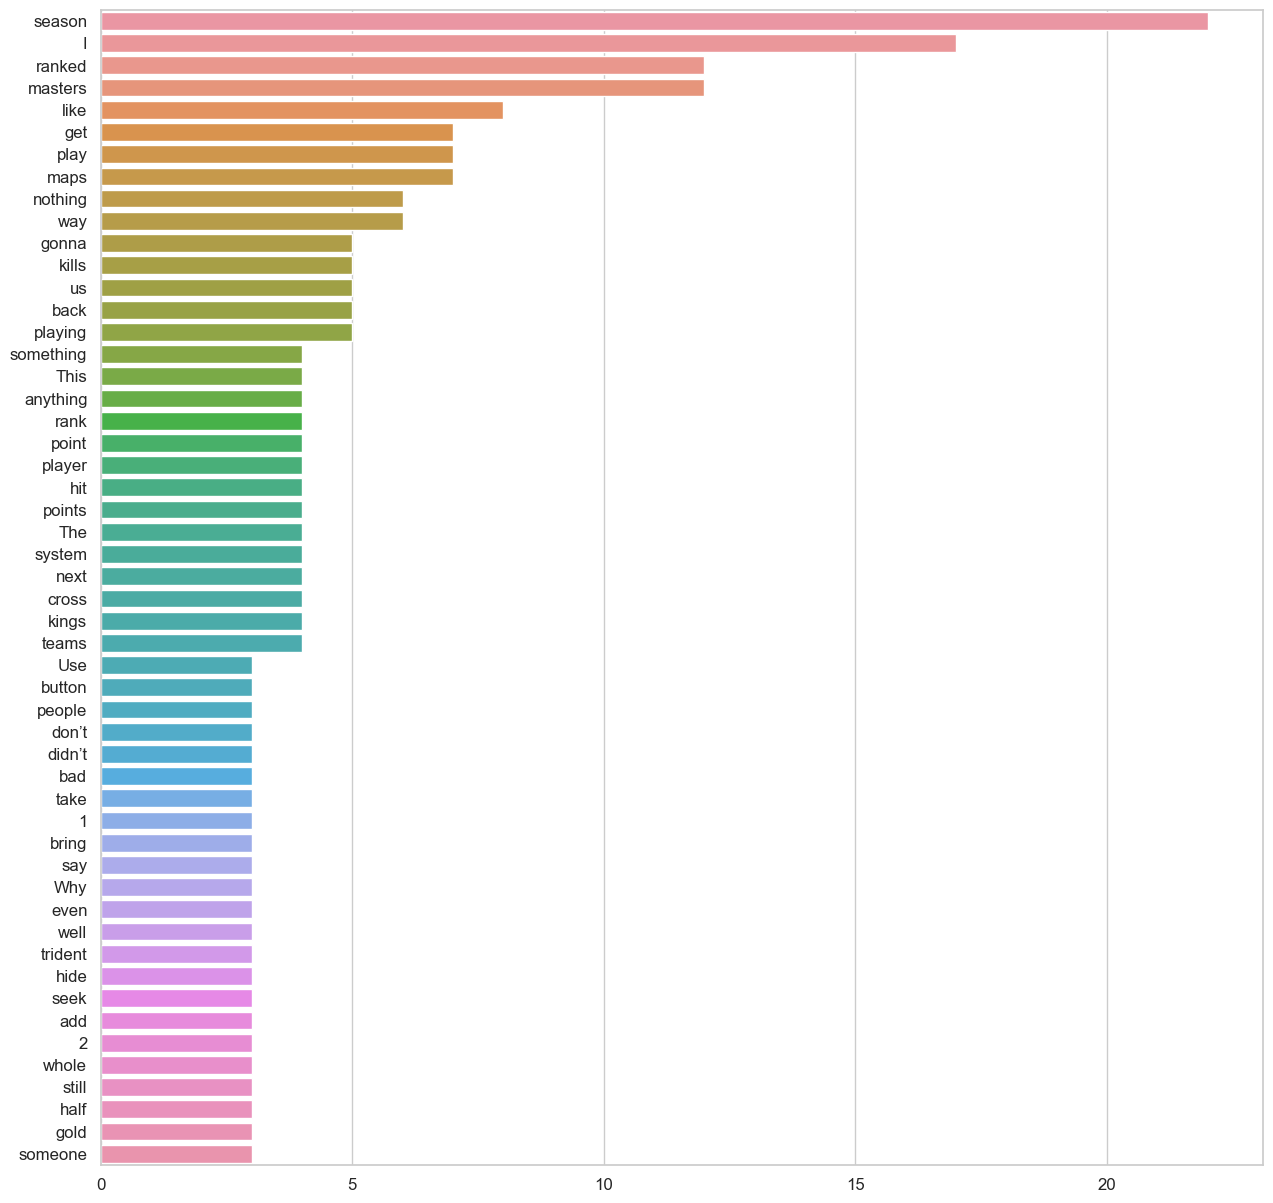

In [50]:
#Simplified counter function

def create_corpus():
    corpus=[]
    
    for x in data['comments'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus()
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)

plt.figure(figsize=(15,15))
sns.barplot(x=y,y=x)

# Simple Analysis - 2 from the data

In [55]:
def clean(comment):
    
    comment = comment.lower()
    comment = re.sub('[^a-z A-Z 0-9-]+', '', comment)
    comment = " ".join([word for word in comment.split() if word not in stop_words])
    
    return comment

In [56]:
data['comment_clean'] = data['comments'].apply(clean)
data.head(10)

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,hours,minute,hour_difference,minute_difference,comment_clean
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19 15:07:18+00:00,59,59.0,11,4.454545,15,7,0,2,use everyone gonna complain matter button
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19 15:06:50+00:00,26,26.0,6,3.500000,15,6,0,1,use doubt button
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19 15:14:59+00:00,48,48.0,8,5.125000,15,14,0,9,please make kills squad wipes mean something
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19 15:14:18+00:00,106,106.0,22,3.863636,15,14,0,9,like greyed master emblem know 90 people dont ...
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19 15:06:04+00:00,80,80.0,17,3.764706,15,6,0,1,didnt tell us anything besides fact lot need f...
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19 15:09:04+00:00,133,66.0,28,3.785714,15,9,0,4,trouble 16 seasons comes ranked manageable mes...
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19 15:11:18+00:00,98,98.0,18,4.500000,15,11,0,6,reminder seasons masters means nothing flex li...
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19 15:13:32+00:00,77,77.0,15,4.200000,15,13,0,8,apologies explains nothing heard get
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19 16:30:27+00:00,32,15.5,7,3.714286,16,30,1,85,cool take storm point
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19 15:15:44+00:00,254,126.5,46,4.543478,15,15,0,10,approximately 1 million people became masters ...


In [57]:
def corpus(text):
    text_list = text.split()
    return text_list

In [59]:
data['comment_lists'] = data['comment_clean'].apply(corpus)
data.head(10)

,username,comments,likes,datetime,Length,mean_sent_length,word_count,mean_word_length,hours,minute,hour_difference,minute_difference,comment_clean,comment_lists
0,deshawn.hw,Use me as a “everyone gonna complain no matter...,"2,200",2023-07-19 15:07:18+00:00,59,59.0,11,4.454545,15,7,0,2,use everyone gonna complain matter button,"[use, everyone, gonna, complain, matter, button]"
1,prizzlethegreat,"Use me as a ""Doubt"" button",764,2023-07-19 15:06:50+00:00,26,26.0,6,3.500000,15,6,0,1,use doubt button,"[use, doubt, button]"
2,no.mans.guy,Please make kills and squad wipes mean something,446,2023-07-19 15:14:59+00:00,48,48.0,8,5.125000,15,14,0,9,please make kills squad wipes mean something,"[please, make, kills, squad, wipes, mean, some..."
3,herodelta,"I like how they greyed out the master emblem, ...",678,2023-07-19 15:14:18+00:00,106,106.0,22,3.863636,15,14,0,9,like greyed master emblem know 90 people dont ...,"[like, greyed, master, emblem, know, 90, peopl..."
4,itsbriangoon,This didn’t tell us anything besides the fact ...,74,2023-07-19 15:06:04+00:00,80,80.0,17,3.764706,15,6,0,1,didnt tell us anything besides fact lot need f...,"[didnt, tell, us, anything, besides, fact, lot..."
5,husseinaljanabi,We had some trouble for 16 seasons when it com...,25,2023-07-19 15:09:04+00:00,133,66.0,28,3.785714,15,9,0,4,trouble 16 seasons comes ranked manageable mes...,"[trouble, 16, seasons, comes, ranked, manageab..."
6,brug_im_sleep,Reminder that this seasons masters means nothi...,146,2023-07-19 15:11:18+00:00,98,98.0,18,4.500000,15,11,0,6,reminder seasons masters means nothing flex li...,"[reminder, seasons, masters, means, nothing, f..."
7,officialapexworld,Apologies.. but this explains nothing and is j...,624,2023-07-19 15:13:32+00:00,77,77.0,15,4.200000,15,13,0,8,apologies explains nothing heard get,"[apologies, explains, nothing, heard, get]"
8,1xtitan,Cool. Now take out Storm point 🤝,87,2023-07-19 16:30:27+00:00,32,15.5,7,3.714286,16,30,1,85,cool take storm point,"[cool, take, storm, point]"
9,raaed.khan214,Approximately 1 million people became masters ...,63,2023-07-19 15:15:44+00:00,254,126.5,46,4.543478,15,15,0,10,approximately 1 million people became masters ...,"[approximately, 1, million, people, became, ma..."


In [60]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['comment_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 35125.37it/s]


851

In [61]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('season', 25),
 ('masters', 16),
 ('ranked', 15),
 ('like', 8),
 ('play', 8),
 ('game', 8),
 ('dont', 7),
 ('nothing', 7),
 ('get', 7),
 ('back', 7)]

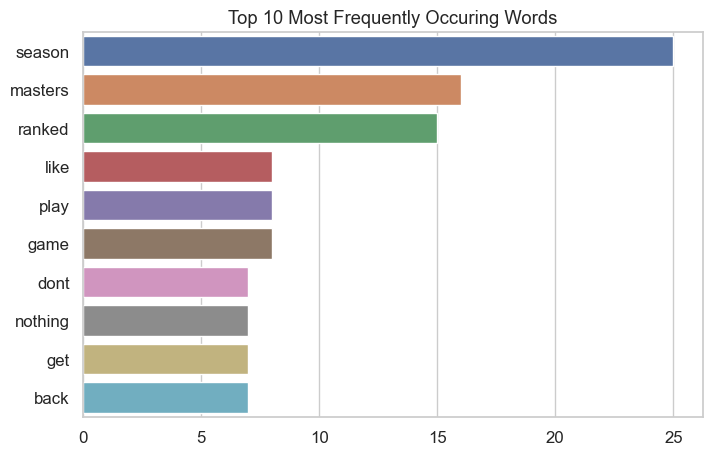

In [62]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

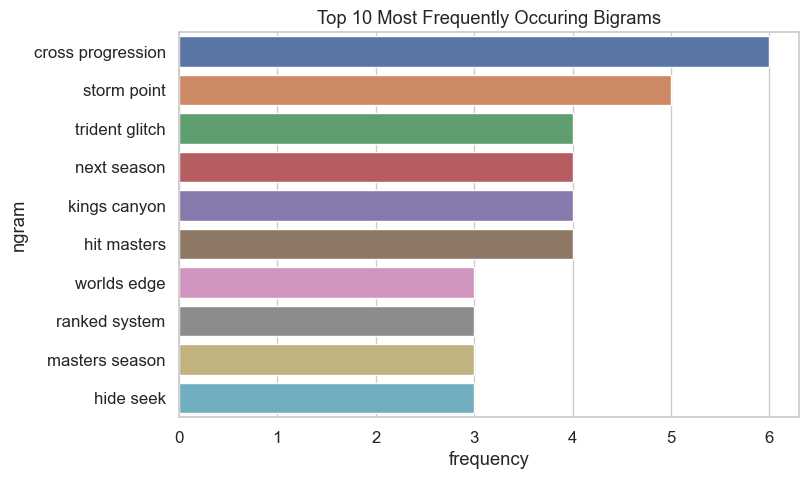

In [63]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['comment_clean'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [64]:
data.to_csv('Instagram-simple-clean.csv', index=False)